### Bible Reading Progress Tracker - Data Exploration

Notebook ini digunakan untuk:
1. Load dan parse WhatsApp chat data
2. Analisis statistik dasar
3. Visualisasi pola komunikasi
4. Identifikasi pattern untuk progress reports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import sys

# suppress warnings in notebook
warnings.filterwarnings('ignore')

# add src to path
sys.path.append('../')

from src.preprocessing.parsing.whatsapp_parser import WhatsAppParser
from src.pipeline.bible_progress_pipeline import BibleProgressPipeline

# set style for plots
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)

#### 1. Load Data

In [2]:
# Load Whatsapp chat data
parser = WhatsAppParser()

CHAT_FILE = Path('../data/raw/whatsapp_exports/_chat.txt')

df = parser.parse_chat_file(CHAT_FILE)
print(f'Total messages parsed: {len(df)}')
print(f'\nDataFrame shape: {df.shape}')
print(f'\nColumns: {df.columns.tolist()}')


Total messages parsed: 19032

DataFrame shape: (19032, 5)

Columns: ['date', 'time', 'sender', 'message', 'timestamp']


In [3]:
# drop columns date and time, as it is redundant
df.drop(['date', 'time'], axis=1, inplace=True)

In [4]:
# Filter system-like messages
df_clean = parser.filter_system_messages(df)
print(f'Total messages after filtering system messages: {len(df_clean)}')

Total messages after filtering system messages: 18949


In [5]:
# saved cleaned messages to csv
df_clean.to_csv('..\data\processed\cleaned_messages.csv', index=False, encoding="utf-8-sig")

In [5]:
# Display sample messages
df_clean.head(15)

,sender,message,timestamp
0,"dr. Andreas C.N., Fp.B.",Siap terimakasih sudah diadd di grup 🙏🏻,2020-08-02 11:52:41
1,Lenny Pandjidharma,sami2 ...,2020-08-02 11:52:51
2,Lenny Pandjidharma,untuk peraturan group dan tata pelaksanaan ......,2020-08-02 11:53:17
3,Oma Lisa,Thanks Lenny.t Lisa ikut ya spytdk cpt pikun a...,2020-08-02 12:20:41
4,Mfitri,"Ok,makasih ci 🙏",2020-08-02 12:22:35
5,Sim Ay Tjan,Thanks Len.🙏🏼,2020-08-02 12:51:17
6,Tjunfebelyana,Thanks Len🙏,2020-08-02 13:01:32
7,Oma Lisa,Mulak kapan dan jam brp Lenny.Gbu txs,2020-08-02 14:22:31
8,Lenny Pandjidharma,"Dimulainya besok, Tante Lisa.",2020-08-02 14:26:58
9,Oma Lisa,Ok,2020-08-02 14:37:45


#### 2. Basic Statistics

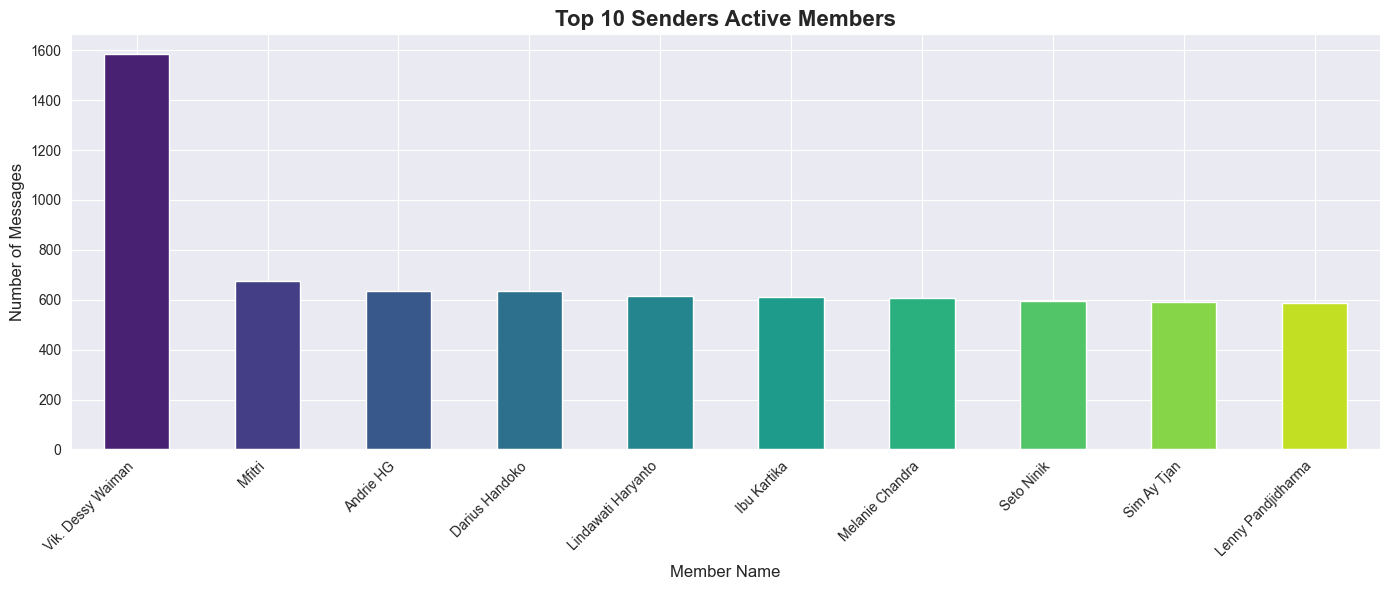

In [6]:
# Message counts by sender
sender_counts = df_clean['sender'].value_counts()

# Top 10 active members
sender_counts.head(10).plot(kind='bar', color=sns.color_palette('viridis', 10))
plt.title('Top 10 Senders Active Members', fontsize=16, fontweight='bold')
plt.xlabel('Member Name', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [7]:
# Messages per day
df_clean['date_only'] = df_clean['timestamp'].dt.date
messages_per_day = df_clean.groupby('date_only').size()

print(f'\nMessages per day statistics:')
print(f'Mean: {messages_per_day.mean():.2f}')
print(f'Median: {messages_per_day.median():.2f}')
print(f'Max: {messages_per_day.max()}')
print(f'Min: {messages_per_day.min()}')


Messages per day statistics:
Mean: 27.34
Median: 28.00
Max: 83
Min: 1


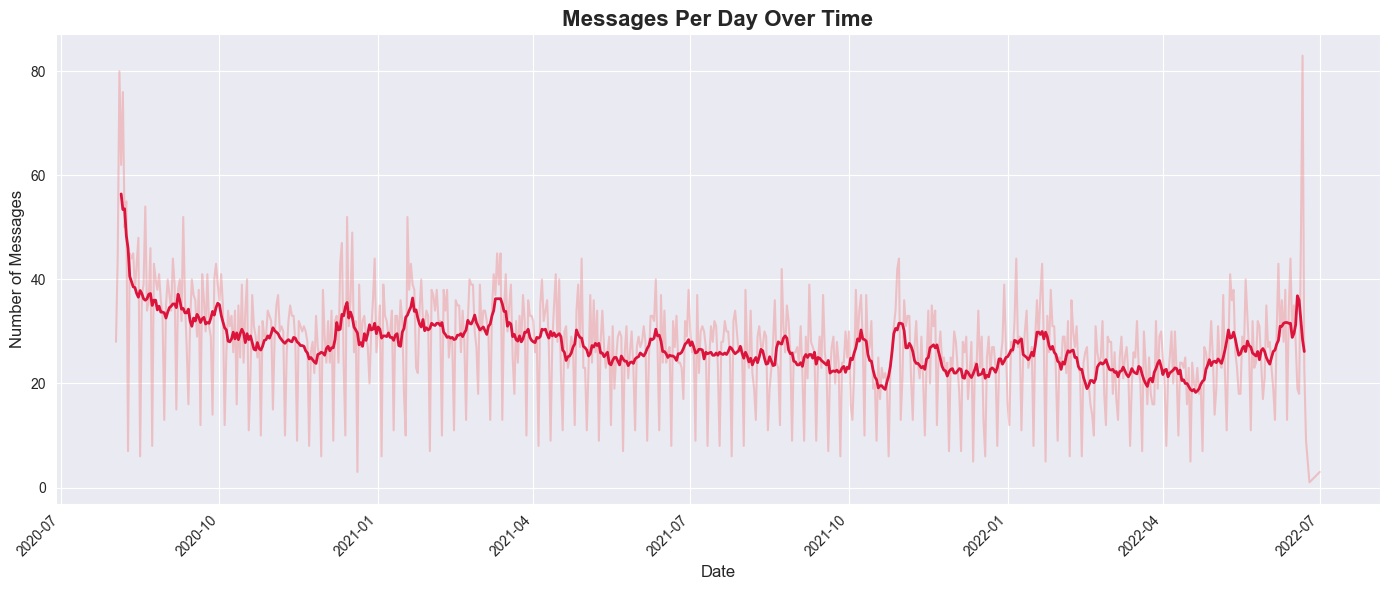

In [8]:
rolling = messages_per_day.rolling(window=7, center=True).mean()
plt.plot(messages_per_day.index, messages_per_day.values, color='lightcoral', alpha=0.4, label='Daily')
plt.plot(rolling.index, rolling.values, color='crimson', linewidth=2, label='7-Day Rolling Average')
plt.title('Messages Per Day Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

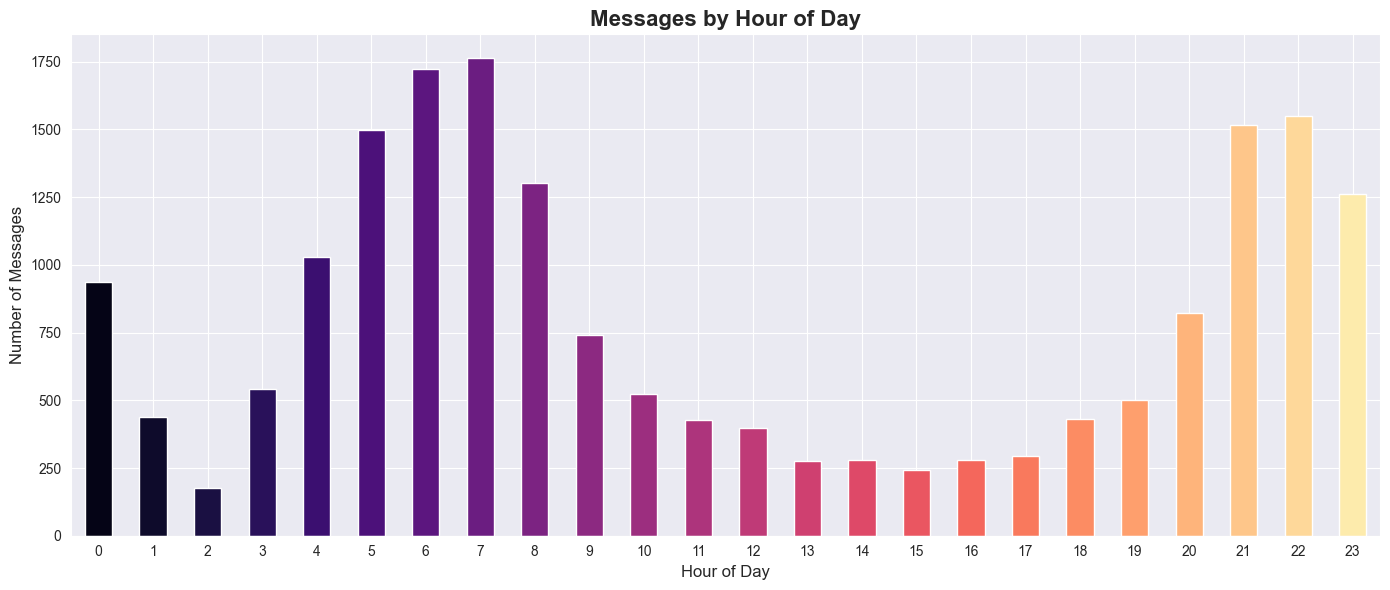

In [9]:
# Messages by hour of day
df_clean['hour'] = df_clean['timestamp'].dt.hour
messages_per_hour = df_clean['hour'].value_counts().sort_index()

messages_per_hour.plot(kind='bar', color=sns.color_palette('magma', 24))
plt.title('Messages by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [10]:
# Message Length Distribution (characters)
df_clean['message_length'] = df_clean['message'].str.len()

overall_mean = df_clean['message_length'].mean()
overall_median = df_clean['message_length'].median()

print(f'\nMessage Length Statistics')
print(f'  Mean: {overall_mean:.2f}')
print(f'  Median: {overall_median:.2f}')


Message Length Statistics
  Mean: 148.65
  Median: 15.00


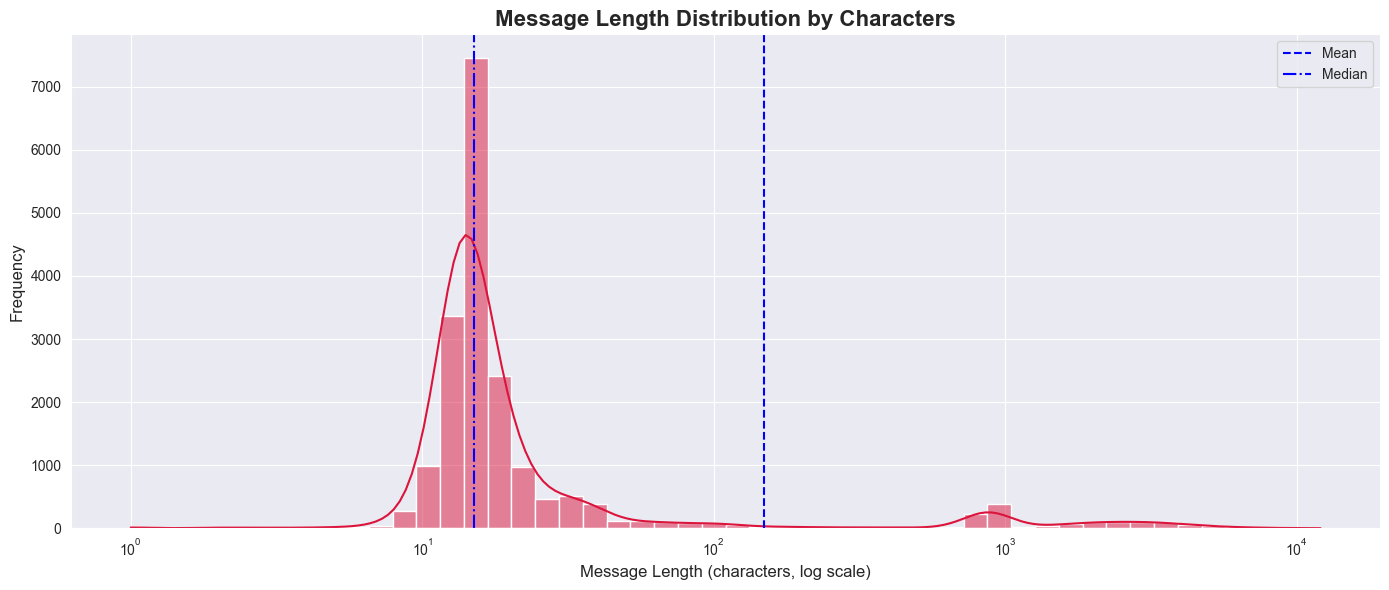

In [11]:
sns.histplot(df_clean['message_length'], bins=50, color='crimson', alpha=0.5, kde=True, log_scale=True)

plt.axvline(np.mean(df_clean['message_length']), color='blue', linestyle='--', label='Mean')
plt.axvline(np.median(df_clean['message_length']), color='blue', linestyle='-.', label='Median')

plt.title('Message Length Distribution by Characters', fontsize=16, fontweight='bold')
plt.xlabel('Message Length (characters, log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Number of lines per message
df_clean['num_lines'] = df_clean['message'].str.count('\n') + 1

overall_lines_mean = df_clean['num_lines'].mean()
overall_lines_median = df_clean['num_lines'].median()

print(f'\nNumber of Lines per Message:')
print(f'  Mean: {overall_lines_mean:.2f}')
print(f'  Median: {overall_lines_median:.2f}')


Number of Lines per Message:
  Mean: 3.92
  Median: 1.00


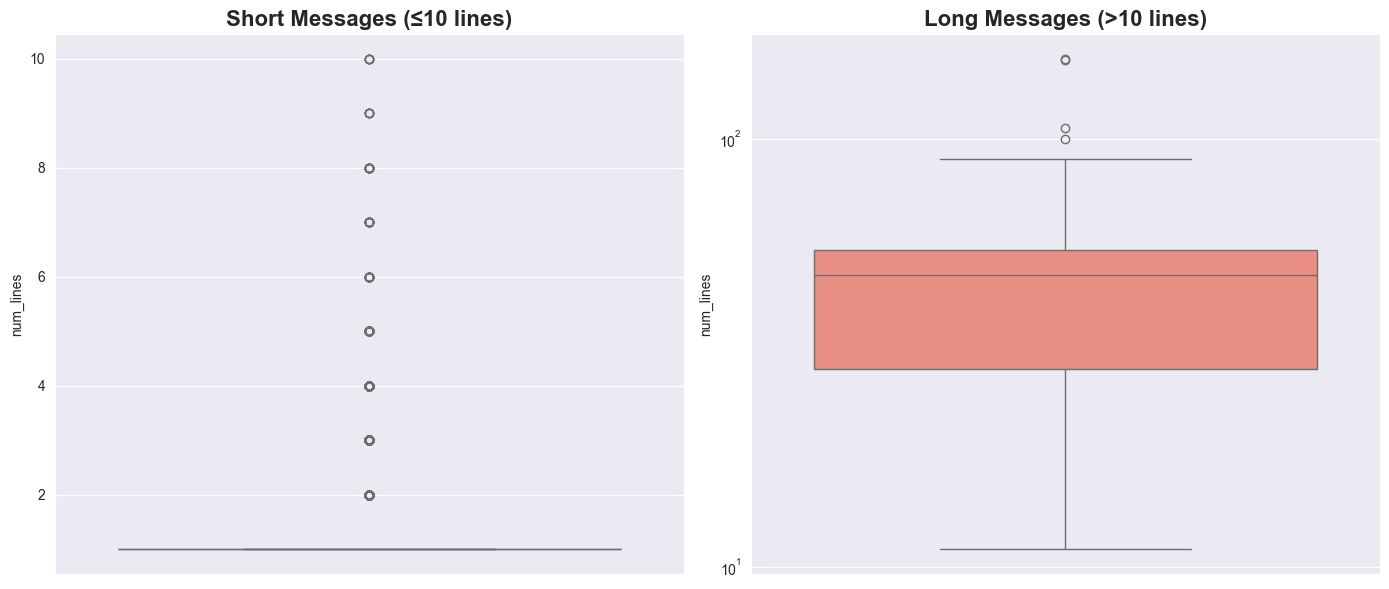

In [13]:
plt.subplot(1, 2, 1)
sns.boxplot(y=df_clean[df_clean['num_lines'] <= 10]['num_lines'], color='skyblue')
plt.title('Short Messages (≤10 lines)', fontsize=16, fontweight='bold')


plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean[df_clean['num_lines'] > 10]['num_lines'], color='salmon')
plt.title('Long Messages (>10 lines)', fontsize=16, fontweight='bold')

plt.yscale('log')

plt.tight_layout()
plt.show()

#### 3. Identify Progress Reports

In [14]:
progress_keywords = ['done', 'selesai', 'sudah', 'finish', '✓', '✅', '☑', '💥']

df_clean['has_progress_keyword'] = df_clean['message'].str.lower().apply(
    lambda x: any(kw in x for kw in progress_keywords)
)

print(f'Message with progress keywords')
print(f'Total: {df_clean["has_progress_keyword"].sum()} out of {len(df_clean)} messages')
print(f'Percentage: {df_clean["has_progress_keyword"].sum() / len(df_clean) * 100:.2f}%')

Message with progress keywords
Total: 16419 out of 18949 messages
Percentage: 86.65%


In [15]:
print('\nSample Messages with Progress Keywords:')
df_clean[df_clean['has_progress_keyword']][['sender', 'message']].head(10)


Sample Messages with Progress Keywords:


,sender,message
0,"dr. Andreas C.N., Fp.B.",Siap terimakasih sudah diadd di grup 🙏🏻
13,Vik. Dessy Waiman,*Introduksi Kitab Kejadian*\n\n*Judul*\n\nTuha...
16,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat be..."
18,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G..."
23,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat be..."
24,Vik. Dessy Waiman,*Introduksi Kitab Kejadian*\n\n*Judul*\n\nTuha...
26,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G..."
28,Melanie Chandra,Kej 1-2 done
29,Lindawati Haryanto,Kej 1-2 done
30,Sherly Cahyadi,Kej 1-2 done


In [16]:
# Extract bible references
pipeline = BibleProgressPipeline()

def extract_bible_ref(message):

    normalized_refs = pipeline.process_message(message)
    if not normalized_refs:
        return None
    
    return ', '.join(ref['normalized_text'] for ref in normalized_refs)

df_clean['bible_reference'] = df_clean['message'].apply(extract_bible_ref)
df_clean['has_bible_ref'] = df_clean['bible_reference'].notna()

print(f'Messages with Bible References')
print(f'Total: {df_clean['has_bible_ref'].sum()}')
print(f'Percentage: {df_clean["has_bible_ref"].sum() / len(df_clean) * 100:.2f}%')

print(pipeline.normalizer.get_stats())

Messages with Bible References
Total: 14465
Percentage: 76.34%
{'exact_match': 14905, 'fuzzy_match': 183, 'failed': 4187}


In [18]:
# Sample messages with bible references
print('\nSample Messages with Bible References:')
df_clean[df_clean['has_bible_ref']][['sender', 'message', 'bible_reference']].tail(50)


Sample Messages with Bible References:


,sender,message,bible_reference
18765,Tjunfebelyana,Wahyu 17-18 done,Wahyu 17-18
18766,Ko Martin,Wahyu 1-18 ✅,Wahyu 1-18
18775,Tejo Jayadi,Wahyu 1-18 done,Wahyu 1-18
18780,Mfitri,Wahyu 17 - 18 done,Wahyu 17-18
18781,Tom,Wahyu 17 - 18 done,Wahyu 17-18
18782,Lenny Pandjidharma,Wahyu 17-18 done,Wahyu 17-18
18783,Nurcahaya Sihombing,Wahyu 17-18 done,Wahyu 17-18
18784,Yoppie,Wahyu 11-18 done,Wahyu 11-18
18786,Villas/Hepihippo,Wahyu 17-18 done,Wahyu 17-18
18787,Lindawati Haryanto,Wahyu 19-20 done,Wahyu 19-20


In [19]:
# Identify likely progress reports 
df_clean['likely_progress'] = (
    df_clean['has_progress_keyword'] & df_clean['has_bible_ref']
)

print(f'Likely Progress Reports')
print(f'Total: {df_clean['likely_progress'].sum()}')
print(f'Percentage: {df_clean["likely_progress"].sum() / len(df_clean) * 100:.2f}%')

Likely Progress Reports
Total: 13393
Percentage: 70.68%


In [20]:
# Sample likely progress reports
print('\nSample Likely Progress Reports:')
df_clean[df_clean['likely_progress']][['sender', 'message']].head(15)


Sample Likely Progress Reports:


,sender,message
16,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat be..."
18,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G..."
23,Vik. Dessy Waiman,"Selamat malam bpk, ibu, sdr, sdri,\nSelamat be..."
26,Vik. Dessy Waiman,"**Bible Reading Cycle 2, 3 Agst 2020**\n\n*📖 G..."
28,Melanie Chandra,Kej 1-2 done
29,Lindawati Haryanto,Kej 1-2 done
30,Sherly Cahyadi,Kej 1-2 done
31,Seto Ninik,Kej 1-2 done
32,🪸Martha 🍁,Kej 1-2 done
33,Dewi Pratiwi,Kej 1-2 done


In [21]:
# saved processed messages
processed = df_clean[df_clean['likely_progress']][['sender', 'message', 'timestamp']]

processed.to_csv('..\data\processed\processed_messages.csv', index=False, encoding="utf-8-sig")


#### 4. Pattern Analysis

In [22]:
# Message length analysis 
df_clean['message_length'] = df_clean['message'].str.len()

# Compare length between progress and non-progress messages
progress_lengths = df_clean[df_clean['likely_progress']]['message_length']
non_progress_lengths = df_clean[~df_clean['likely_progress']]['message_length']

print(f'\nMessage Length Statistics')
print(f'\nProgress reports:')
print(f'  Mean: {progress_lengths.mean():.2f}')
print(f'  Median: {progress_lengths.median():.2f}')

print(f'\nNon-Progress reports:')
print(f'  Mean: {non_progress_lengths.mean():.2f}')
print(f'  Median: {non_progress_lengths.median():.2f}')


Message Length Statistics

Progress reports:
  Mean: 44.69
  Median: 14.00

Non-Progress reports:
  Mean: 399.26
  Median: 18.00


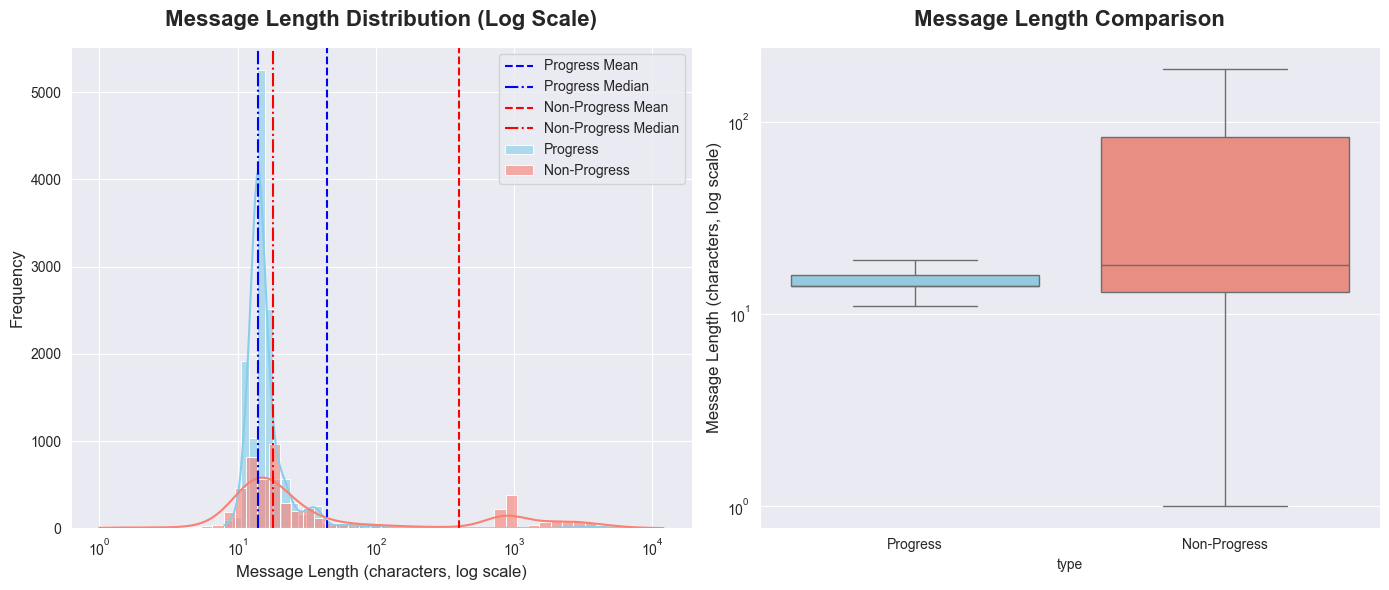

In [23]:

plt.subplot(1, 2, 1)
sns.histplot(progress_lengths, bins=50, color='skyblue', alpha=0.6, label='Progress', kde=True, log_scale=True)
sns.histplot(non_progress_lengths, bins=50, color='salmon',alpha=0.6, label='Non-Progress', kde=True, log_scale=True)

plt.axvline(np.mean(progress_lengths), color='blue', linestyle='--', label='Progress Mean')
plt.axvline(np.median(progress_lengths), color='blue', linestyle='-.', label='Progress Median')

plt.axvline(np.mean(non_progress_lengths), color='red', linestyle='--', label='Non-Progress Mean')
plt.axvline(np.median(non_progress_lengths), color='red', linestyle='-.', label='Non-Progress Median')

plt.title('Message Length Distribution (Log Scale)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Message Length (characters, log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

df_box = pd.DataFrame({
    'message_length': np.concatenate([progress_lengths, non_progress_lengths]),
    'type': ['Progress'] * len(progress_lengths) + ['Non-Progress'] * len(non_progress_lengths)
})

plt.subplot(1, 2, 2)
sns.boxplot(data=df_box, x='type', y='message_length', palette={'Progress': 'skyblue', 'Non-Progress': 'salmon'}, showfliers=False)
plt.yscale('log')
plt.xticks([0, 1], ['Progress', 'Non-Progress'])
plt.title('Message Length Comparison', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Message Length (characters, log scale)', fontsize=12)
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

In [24]:
# Progress by Members
progress_by_member = df_clean[df_clean['likely_progress']].groupby('sender').size().sort_values(ascending=False)

print(f'Progress Reports by Members (Top 20)')
progress_by_member.head(20)

Progress Reports by Members (Top 20)


sender
Lindawati Haryanto          556
Ci Ina Paperku              535
Darius Handoko              531
Andrie HG                   531
Seto Ninik                  531
susianawati309              507
Ivan teguh                  499
Nurcahaya Sihombing         492
🎍                           490
Lenny Pandjidharma          485
Dewi Pratiwi                485
Mfitri                      465
Melanie Chandra             461
Sim Ay Tjan                 444
Ruri Handoko                440
Kristin WIjaya Nusantara    404
Endang Surati               391
Agnes                       365
Tjunfebelyana               338
🪸Martha 🍁                   298
dtype: int64

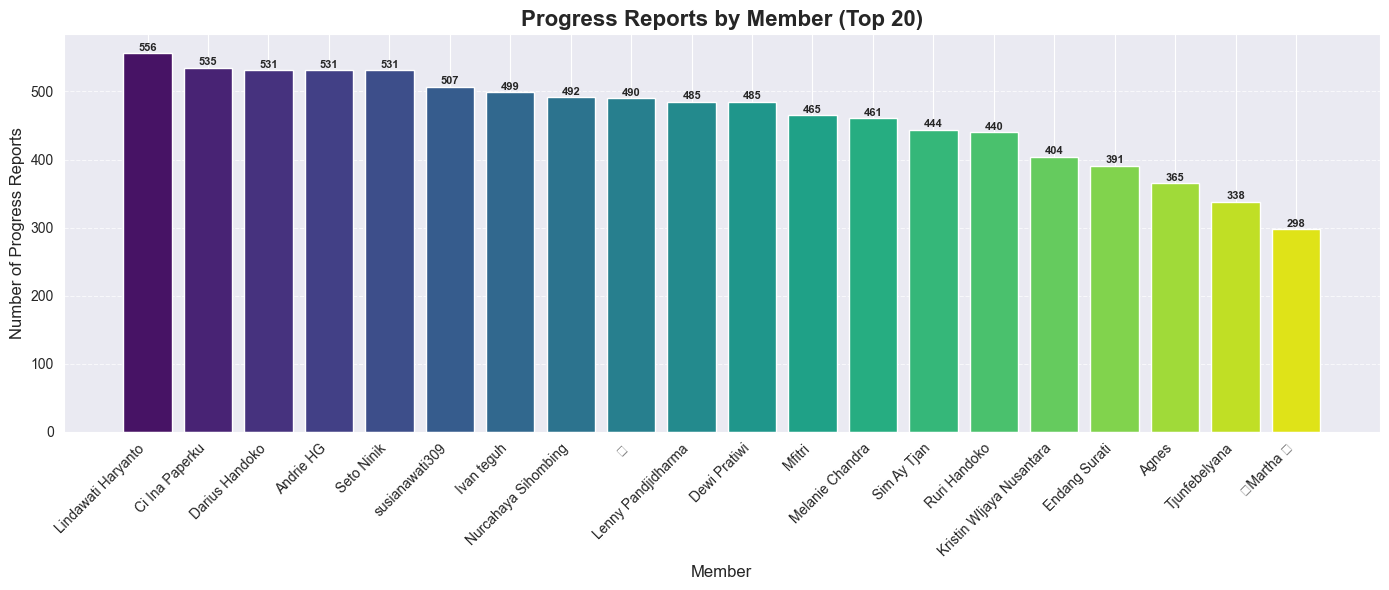

In [25]:
bars = plt.bar(progress_by_member.head(20).index,
               progress_by_member.head(20).values,
               color=sns.color_palette('viridis', 20))

plt.title('Progress Reports by Member (Top 20)', fontsize=16, fontweight='bold')
plt.xlabel('Member', fontsize=12)
plt.ylabel('Number of Progress Reports', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()